In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 1.Dropping columns

In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1, inplace = True)

In [8]:
df.shape

(10000, 10)

### 2.Select particular columns while reading 

In [9]:
df_specific = pd.read_csv('churn.csv', usecols=['Gender', 'Age', 'Tenure', 'Balance'])

In [10]:
df_specific.head()

,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


### 3.Reading a part of the DataFrame

In [11]:
df_part = pd.read_csv("churn.csv",nrows=5000)

In [12]:
df_part.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Another way
df_part1 = pd.read_csv("churn.csv",skiprows = 5000)
df_part1.head()

,5000,15710408,Cunningham,584,Spain,Female,38,3,0,2,1,1.1,4525.4,0.1
0,5001,15598695,Fields,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0
1,5002,15649354,Johnston,754,Spain,Male,35,4,0.00,2,1,1,9658.41,0
2,5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,2,1,1,182627.25,1
3,5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,1,13177.40,0
4,5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,1,0,43568.31,1


### 4.Sample data

In [14]:
df_sample = df.sample(n=1000)
df_sample.shape

(1000, 10)

In [15]:
df_sample1 = df.sample(frac=0.1)
df_sample1.shape

(1000, 10)

### 5.Checking the missing values

In [16]:
df.isnull().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 6.Adding missing values using loc and iloc
- These methods select rows and columns based on label,index
- loc: selects with label
- iloc:selects with index

In [18]:
missing_index = np.random.randint(10000, size= 20)

In [19]:
df.loc[missing_index, ['Balance','Geography']] = np.nan

In [20]:
df.iloc[missing_index, -1] = np.nan

In [21]:
df.isnull().sum()

Geography          19
Gender              0
Age                 0
Tenure              0
Balance            19
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             19
dtype: int64

### 7.Filling missing values

In [22]:
df['Geography'].value_counts()

France     5003
Germany    2505
Spain      2473
Name: Geography, dtype: int64

In [23]:
mode = df['Geography'].value_counts().index[0]
df['Geography'].fillna(value=mode,inplace=True)

In [24]:
df['Geography'].value_counts()

France     5022
Germany    2505
Spain      2473
Name: Geography, dtype: int64

In [25]:
mean = df['Balance'].mean()
df['Balance'].fillna(value=mean, inplace=True)

### 8.Dropping missing values

In [26]:
df.dropna(axis=0,how='any',inplace=True)

In [27]:
df.shape

(9981, 10)

### 9.Selecting rows based on conditions

In [28]:
France = df[(df['Geography'] == 'France') & df['Exited']==1]

In [29]:
France['Geography'].value_counts()

France    807
Name: Geography, dtype: int64

### 10. Describing the conditions with query

In [30]:
df2 = df.query('80000 <Balance < 100000')

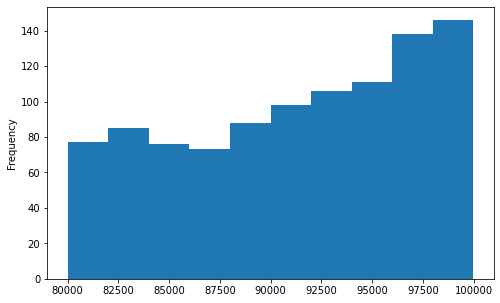

In [31]:
df2['Balance'].plot(kind='hist', figsize = (8,5))

### 11.Describing the conditions with isin

In [32]:
df[df['Tenure'].isin([4,6,9,10])][:5]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0
8,France,Male,44,4,142051.07,2,0,1,74940.50,0.0
10,France,Male,31,6,102016.72,2,0,0,80181.12,0.0
12,France,Female,34,10,0.00,2,1,0,26260.98,0.0
17,Spain,Female,24,9,0.00,2,1,1,14406.41,0.0


### 12.The groupby function

In [33]:
df.columns

Index(['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [34]:
df[['Geography', 'Gender','Exited']].groupby(['Geography', 'Gender']).mean()

Exited
Geography Gender          
France    Female  0.202924
          Male    0.127094
Germany   Female  0.375315
          Male    0.277778
Spain     Female  0.211592
          Male    0.131313

### 13. Applying multiple aggregate functions with groupby

In [35]:
df[['Geography', 'Gender','Exited']].groupby(['Geography', 'Gender']).agg(['mean','count','max'])

Exited           
                      mean count  max
Geography Gender                     
France    Female  0.202924  2257  1.0
          Male    0.127094  2746  1.0
Germany   Female  0.375315  1191  1.0
          Male    0.277778  1314  1.0
Spain     Female  0.211592  1087  1.0
          Male    0.131313  1386  1.0

### 14.Applying different aggregate functions to different groups

In [36]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg(
 Number_of_churned_customers = pd.NamedAgg('Exited', 'sum'),
 Average_balance_of_customers = pd.NamedAgg('Balance', 'mean')
)

In [37]:
df_summary

,Number_of_churned_customers,Average_balance_of_customers
Geography,,
France,807.0,62033.976108
Germany,812.0,119740.194583
Spain,412.0,61890.972026


In [38]:
df_summary1 = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg({'Exited':'sum', 'Balance':'mean'})
df_summary1.rename(columns={'Exited':'# of churned customers', 'Balance':'Average Balance of Customers'},inplace=True)
df_summary1

,# of churned customers,Average Balance of Customers
Geography,,
France,807.0,62033.976108
Germany,812.0,119740.194583
Spain,412.0,61890.972026


### 15.Reset the index

In [39]:
df_new = df[['Geography','Exited','Balance']].groupby(['Geography','Exited']).mean().reset_index()

In [40]:
df_new

,Geography,Exited,Balance
0,France,0.0,60334.625257
1,France,1.0,70869.758228
2,Germany,0.0,119428.939858
3,Germany,1.0,120389.153017
4,Spain,0.0,59764.938113
5,Spain,1.0,72526.301869


### 16. Reset the index with a drop


In [41]:
df[['Geography','Exited','Balance']].sample(n=5).reset_index(drop=True)

,Geography,Exited,Balance
0,Spain,0.0,114440.24
1,France,1.0,0.00
2,Spain,0.0,0.00
3,France,0.0,135438.40
4,Spain,0.0,0.00


### 17.Set a particular column as the index

In [42]:
df_new.set_index('Geography')

,Exited,Balance
Geography,,
France,0.0,60334.625257
France,1.0,70869.758228
Germany,0.0,119428.939858
Germany,1.0,120389.153017
Spain,0.0,59764.938113
Spain,1.0,72526.301869


### 18.Inserting a new columns

In [43]:
New_column = np.random.randint(10,size=6)

In [44]:
df_new['New_col'] = New_column

In [45]:
df_new

,Geography,Exited,Balance,New_col
0,France,0.0,60334.625257,9
1,France,1.0,70869.758228,4
2,Germany,0.0,119428.939858,7
3,Germany,1.0,120389.153017,1
4,Spain,0.0,59764.938113,0
5,Spain,1.0,72526.301869,2


In [46]:
New_col2 = np.random.randint(10,size=6)

In [47]:
# df_new.insert(0, 'Group', group)
# df_new

### 19.The Where function

In [48]:
df_new['Balance'] = df_new['Balance'].where(df_new['New_col'] >=6,0)

In [49]:
df_new

,Geography,Exited,Balance,New_col
0,France,0.0,60334.625257,9
1,France,1.0,0.000000,4
2,Germany,0.0,119428.939858,7
3,Germany,1.0,0.000000,1
4,Spain,0.0,0.000000,0
5,Spain,1.0,0.000000,2


### 20.Rank function

In [50]:
df_new['rank'] = df_new['Balance'].rank(method='first',ascending=False).astype('int')

In [51]:
df_new

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60334.625257,9,2
1,France,1.0,0.000000,4,3
2,Germany,0.0,119428.939858,7,1
3,Germany,1.0,0.000000,1,4
4,Spain,0.0,0.000000,0,5
5,Spain,1.0,0.000000,2,6


### 21. Number of unique values in a column


In [52]:
df['Geography'].nunique()

3

In [53]:
df['Geography'].value_counts().size

3

### 22. Memory usage

In [54]:
df.memory_usage()

Index              344080
Geography           79848
Gender              79848
Age                 79848
Tenure              79848
Balance             79848
NumOfProducts       79848
HasCrCard           79848
IsActiveMember      79848
EstimatedSalary     79848
Exited              79848
dtype: int64

### 23. The category data type

In [55]:
df['Geography'] = df['Geography'].astype('category')

In [56]:
df.memory_usage()

Index              344080
Geography           10113
Gender              79848
Age                 79848
Tenure              79848
Balance             79848
NumOfProducts       79848
HasCrCard           79848
IsActiveMember      79848
EstimatedSalary     79848
Exited              79848
dtype: int64

### 24. Replacing values

In [57]:
df_new['New_col'].replace(1,'B1')

0     9
1     4
2     7
3    B1
4     0
5     2
Name: New_col, dtype: object

In [58]:
df_new['New_col'].replace({1:'B1',6:'B2'})

0     9
1     4
2     7
3    B1
4     0
5     2
Name: New_col, dtype: object

### 25. Drawing a histogram

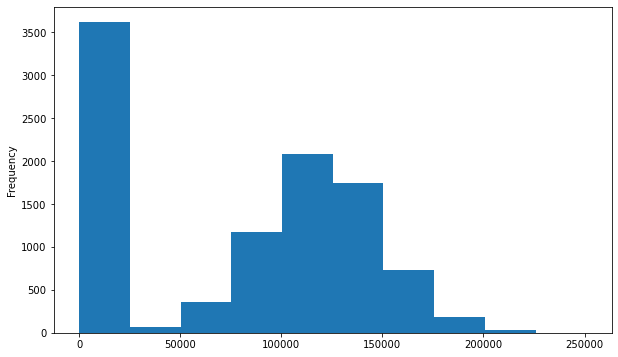

In [59]:
df['Balance'].plot(kind='hist',figsize=(10,6))

### 26. Reducing the decimal points of floats

In [60]:
df_new.round(1)

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60334.6,9,2
1,France,1.0,0.0,4,3
2,Germany,0.0,119428.9,7,1
3,Germany,1.0,0.0,1,4
4,Spain,0.0,0.0,0,5
5,Spain,1.0,0.0,2,6


In [61]:
df_new

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60334.625257,9,2
1,France,1.0,0.000000,4,3
2,Germany,0.0,119428.939858,7,1
3,Germany,1.0,0.000000,1,4
4,Spain,0.0,0.000000,0,5
5,Spain,1.0,0.000000,2,6


### 27. Changing the display options


In [62]:
pd.set_option("display.precision", 2)

In [63]:
df_new

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60334.63,9,2
1,France,1.0,0.00,4,3
2,Germany,0.0,119428.94,7,1
3,Germany,1.0,0.00,1,4
4,Spain,0.0,0.00,0,5
5,Spain,1.0,0.00,2,6


### 28. Calculating the percentage change through a column


In [64]:
ser = pd.Series([4,5,6,6,7,7,8,7,234,34])
ser.pct_change()
#It is useful when calculating the percentage of change in a time series or sequential array of elements.

0      NaN
1     0.25
2     0.20
3     0.00
4     0.17
5     0.00
6     0.14
7    -0.12
8    32.43
9    -0.85
dtype: float64

### 29. Filtering based on strings


In [65]:
df_new['Names'] = ['Jack','Julia','Mike','Michael','Tim','Amber']

In [66]:
df_new[df_new.Names.str.startswith('Mi')]

,Geography,Exited,Balance,New_col,rank,Names
2,Germany,0.0,119428.94,7,1,Mike
3,Germany,1.0,0.00,1,4,Michael


### 30. Styling a dataframe


In [71]:
df_new.style.highlight_max(axis=0, color='lightgreen')

,Geography,Exited,Balance,New_col,rank,Names
0,France,0.00,60334.63,9,2,Jack
1,France,1.00,0.00,4,3,Julia
2,Germany,0.00,119428.94,7,1,Mike
3,Germany,1.00,0.00,1,4,Michael
4,Spain,0.00,0.00,0,5,Tim
5,Spain,1.00,0.00,2,6,Amber
